# Homework 7: Problem 1
## _k_-means Clustering

Programmatic overhead; import this homework's utility module as well as math, numpy, scipy and matplotlib.

In [1]:
import HW07_utils as ut
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from scipy import io as spio

Load the MNIST data into memory.

In [2]:
BASE_DIR = '/Users/mitch/Documents/Cal/2_2017_Spring/COMPSCI 289A - Intro to Machine Learning/HW07/'
DATA_PATH = 'Data/hw7_data/mnist_data/images.mat'
mnistdataraw = ut.load_data(DATA_PATH,BASE_DIR,'images')
mnistdata = np.empty((60000,784))
for i in range(60000):
    mnistdata[i]=np.reshape(mnistdataraw[:,:,i],(784,))

In [6]:
class Cluster:
    """ A class to perform k-means clustering"""
    
    def __init__(self,k):
        self.k = k
        self.means = None
        self.clusters = None
        
        
    def update_means(self):
        """Method to calculate the means of each cluster"""
        for i in range(self.k):
            cluster_i = np.array(self.clusters[i])
            mu_i = np.mean(cluster_i,axis=0)
            self.means[i] = mu_i
            
    def update_clusters(self):
        """ Method to take in a set of means and reclassify points according to the new nearest cluster center"""
        new_clusters = [[] for k_i in range(self.k)]
        clusters_changed = 0
        
        for i in range(self.k):
            while True:
                try:
                    x_j = self.clusters[i].pop(0)
                    # Create object to store the i-value of the closest mean, and the distance to that mean
                    cluster_index = self.assign_cluster(x_j)
                    
                    # Reclassify point
                    if cluster_index != i:
                        clusters_changed += 1
                    new_clusters[cluster_index].append(x_j)

                except:
                    break
        self.clusters = new_clusters

        return clusters_changed
    
    
    def forgy_init(self,data):
        """
        Execute the Forgy initializaiton method: 
                -choose k random sample points from data to be initial means
        """
        select = np.random.choice(len(data),self.k,replace=False)
        self.means = data[select]

        # Assign points according to these random means
        self.clusters = [[] for k_i in range(self.k)]
        for datapoint in data:
            cluster_index = self.assign_cluster(datapoint)
            self.clusters[cluster_index].append(datapoint)
    
    
    def assign_cluster(self,x_j):
        """Assign point x_j to the cluster with nearest mean"""
        nearest_mean_index = -1
        nearest_mean_dist = math.inf
        for i in range(self.k):
            # Check the distance of the point to each mean
            mu_i = self.means[i]
            d = np.linalg.norm(x_j-mu_i)
            if d < nearest_mean_dist:
                # Reassign closest mean
                nearest_mean_index = i
                nearest_mean_dist = d
    
        return nearest_mean_index    
    
                            
    def lloyd_alg(self):
        """
        Execute Lloyd's algorithm to construct k clusters:
                -Minimize the sum of squared distances of points from cluster means
                -Use k-means heuristic to alternate between updating means and cluster IDs
        """
        clusters_changed = 1
        counter = 0
        while clusters_changed != 0:
            print('Iteration', counter)
            
            self.update_means()
            clusters_changed = self.update_clusters()
            print(clusters_changed)
            counter += 1
        
        print('Finished')
        for cluster in self.clusters:
                print(np.shape(cluster))

Test the clustering algorithm on a simple dataset.

In [7]:
simpledata = np.array([[3,10,10],[9,10,10],[9,9,10],[9,4,10],[10,3,10],[4,8,10],[9,8,10],[2,8,10],[8,2,10]])
clustering = Cluster(3)
clustering.forgy_init(simpledata)
clustering.lloyd_alg()
print(np.array(clustering.clusters))

Iteration 0
1
Iteration 1
0
Finished
(3, 3)
(3, 3)
(3, 3)
[[[ 3 10 10]
  [ 4  8 10]
  [ 2  8 10]]

 [[ 9 10 10]
  [ 9  9 10]
  [ 9  8 10]]

 [[ 9  4 10]
  [10  3 10]
  [ 8  2 10]]]


In [9]:
clustering_k5 = Cluster(5)
clustering_k5.forgy_init(mnistdata)
clustering_k5.lloyd_alg()
    

Iteration 0
11738
Iteration 1
6207
Iteration 2
4116
Iteration 3
3457
Iteration 4
3170
Iteration 5
3138
Iteration 6
3042
Iteration 7
2661
Iteration 8
2285
Iteration 9
1963
Iteration 10
1740
Iteration 11
1604
Iteration 12
1488
Iteration 13
1457
Iteration 14
1653
Iteration 15
1828
Iteration 16
2045
Iteration 17
2088
Iteration 18
2104
Iteration 19
1910
Iteration 20
1686
Iteration 21
1479
Iteration 22
1239
Iteration 23
970
Iteration 24
666
Iteration 25
490
Iteration 26
329
Iteration 27
239
Iteration 28
179
Iteration 29
126
Iteration 30
75
Iteration 31
54
Iteration 32
27
Iteration 33
25
Iteration 34
24
Iteration 35
7
Iteration 36
5
Iteration 37
3
Iteration 38
1
Iteration 39
2
Iteration 40
2
Iteration 41
3
Iteration 42
2
Iteration 43
2
Iteration 44
1
Iteration 45
1
Iteration 46
2
Iteration 47
3
Iteration 48
1
Iteration 49
1
Iteration 50
0
Finished
(10901, 784)
(11630, 784)
(16619, 784)
(5563, 784)
(15287, 784)


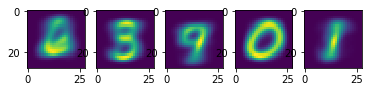

In [21]:
k5 = plt.figure()
for k in range(5):
    cluster = clustering_k5.means[k]
    center = np.reshape(cluster,(28,28))

    k5.add_subplot(1,5,k+1)
    plt.imshow(center)
plt.savefig(BASE_DIR+'Figures/MNIST_k05.jpg')
plt.show()

In [10]:
clustering_k10 = Cluster(10)
clustering_k10.forgy_init(mnistdata)
clustering_k10.lloyd_alg()

Iteration 0
16393
Iteration 1
7565
Iteration 2
5146
Iteration 3
4241
Iteration 4
4000
Iteration 5
3634
Iteration 6
2980
Iteration 7
2302
Iteration 8
1701
Iteration 9
1351
Iteration 10
1042
Iteration 11
883
Iteration 12
754
Iteration 13
734
Iteration 14
675
Iteration 15
651
Iteration 16
674
Iteration 17
713
Iteration 18
718
Iteration 19
765
Iteration 20
816
Iteration 21
825
Iteration 22
821
Iteration 23
824
Iteration 24
814
Iteration 25
831
Iteration 26
827
Iteration 27
746
Iteration 28
778
Iteration 29
725
Iteration 30
661
Iteration 31
547
Iteration 32
488
Iteration 33
414
Iteration 34
360
Iteration 35
291
Iteration 36
242
Iteration 37
235
Iteration 38
195
Iteration 39
172
Iteration 40
160
Iteration 41
160
Iteration 42
150
Iteration 43
129
Iteration 44
118
Iteration 45
100
Iteration 46
104
Iteration 47
103
Iteration 48
104
Iteration 49
97
Iteration 50
89
Iteration 51
79
Iteration 52
87
Iteration 53
78
Iteration 54
71
Iteration 55
55
Iteration 56
54
Iteration 57
54
Iteration 58
60
Itera

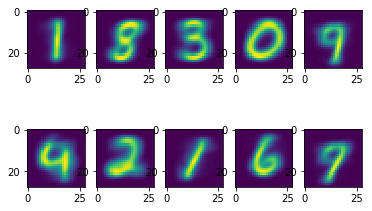

In [19]:
k10 = plt.figure()
for k in range(10):
    cluster = clustering_k10.means[k]
    center = np.reshape(cluster,(28,28))

    k10.add_subplot(2,5,k+1)
    plt.imshow(center)
plt.savefig(BASE_DIR+'Figures/MNIST_k10.jpg')
plt.show()

In [11]:
clustering_k20 = Cluster(20)
clustering_k20.forgy_init(mnistdata)
clustering_k20.lloyd_alg()

Iteration 0
18870
Iteration 1
9819
Iteration 2
6728
Iteration 3
4908
Iteration 4
3726
Iteration 5
2961
Iteration 6
2337
Iteration 7
1944
Iteration 8
1743
Iteration 9
1593
Iteration 10
1424
Iteration 11
1201
Iteration 12
1081
Iteration 13
986
Iteration 14
968
Iteration 15
897
Iteration 16
829
Iteration 17
721
Iteration 18
650
Iteration 19
535
Iteration 20
483
Iteration 21
430
Iteration 22
377
Iteration 23
303
Iteration 24
275
Iteration 25
276
Iteration 26
243
Iteration 27
195
Iteration 28
204
Iteration 29
190
Iteration 30
158
Iteration 31
155
Iteration 32
156
Iteration 33
161
Iteration 34
139
Iteration 35
110
Iteration 36
121
Iteration 37
101
Iteration 38
95
Iteration 39
99
Iteration 40
88
Iteration 41
73
Iteration 42
56
Iteration 43
50
Iteration 44
40
Iteration 45
47
Iteration 46
56
Iteration 47
67
Iteration 48
68
Iteration 49
79
Iteration 50
85
Iteration 51
63
Iteration 52
64
Iteration 53
55
Iteration 54
44
Iteration 55
40
Iteration 56
39
Iteration 57
48
Iteration 58
46
Iteration 59
4

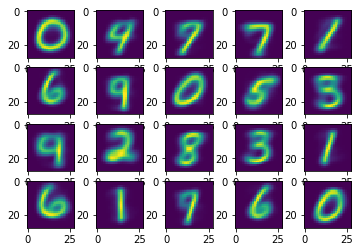

In [23]:
k20 = plt.figure()
for k in range(20):
    cluster = clustering_k20.means[k]
    center = np.reshape(cluster,(28,28))

    k20.add_subplot(4,5,k+1)
    plt.imshow(center)
plt.savefig(BASE_DIR+'Figures/MNIST_k20.jpg')
plt.show()